# Tutorial for processing KOALA data with PyKOALA
# Using PyKOALA KOALA-specific tools
# 2. Obtaining the night calibration

In [1]:
# # %% ============================================================================
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # Load all PyKOALA tasks using  load_PyKOALA.py  / Import PyKOALA 
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------
# # # -----------------------------------------------------------------------------

# # Here we import PyKOALA
# # Ángel just read this file : "/DATA/KOALA/Python/Pablo/load_Pablo_PyKOALA.py" 
# # (now it is a exec command in Spyder, but it just reads  and execute the file importing everything)
# #
# pykoala_load_file = "/DATA/KOALA/Python/Pablo/load_Pablo_PyKOALA.py"
# exec(compile(open(pykoala_load_file, "rb").read(), pykoala_load_file, 'exec'))   # This just reads the file.

# # For making it easier and perhaps happier to whoever is reading this,
# # the pykoala_load_file in Ángel's local folder does the following:

from os import getcwd, chdir
import sys

pykoala_pablo_path = "/DATA/KOALA/Python/Pablo/koala/src/pykoala/"

# # We are running in  []/koala/src/koala/, modules are in koala
# # With this we can run koala packages without importing them
# # Also avoiding including many times the directories in the path

original_system_path =[]
for item in sys.path:
    #print("Original",item)
    original_system_path.append(item)

# # This is from where Python will look for "koala"
sys.path.append(pykoala_pablo_path[:-8])

# Change to PyKOALA folder
original_folder=getcwd() 
chdir(pykoala_pablo_path)
#print("Changing to path", pykoala_pablo_path)

from pykoala import __version__

from pykoala.ancillary import *
from pykoala.cubing import *
from pykoala.data_container import *
from pykoala.rss import *

from pykoala.corrections.astrometry import *
from pykoala.corrections.atmospheric_corrections import *
from pykoala.corrections.correction import *
#from pykoala.corrections.clean_residuals import * 
#from koala.corrections.fix_wavelengths import *   # No funciona
from pykoala.corrections.flux_calibration import *
from pykoala.corrections.sky import *
from pykoala.corrections.throughput import *

from pykoala.exceptions.exceptions import *

from pykoala.instruments.koala_ifu import *
#from pykoala.instruments.koala_cube import *  # ANGEL TESTING WITH CUBES
#from pykoala.instruments.hector_ifu import *
#from pykoala.instruments.weave import *

from pykoala.plotting.plot_plot import * 
from pykoala.plotting.qc_plot import *  
from pykoala.plotting.rss_plot import *  

#from koala.register.registration_ext_source import *  # DOES NOT WORK FOR ANGEL
#from pykoala.register.registration import * 

# ANGEL
from pykoala.spectra.onedspec import *  
from pykoala.corrections.wavelength_corrections import * 
from pykoala.corrections.night_calibration import *



# Return to original folder
chdir(original_folder)
#print("Returning to original path", original_folder)

# Clean the path and leave only what matters
sys.path = []
for item in original_system_path:
    sys.path.append(item)
if pykoala_pablo_path[:-8] not in sys.path: 
    sys.path.append(pykoala_pablo_path[:-8])

# This is something that needs Pablo's PyKOALA for not complaining the plots...
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# # # -----------------------------------------------------------------------------
# # %% ============================================================================
# # # Ignore warnings
# # # -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
# #from astropy.utils.exceptions import AstropyWarning
# # #----------------------------------------------------------------

# Prepare the data

& read RSS files already pre-processed with 2dFdr

In [2]:
aaomega_arms = {'blue': 1, 'red': 2}
aaomega_gratings = {'blue': "580V", 'red': "385R"}

# # Set the folder with the data
path_to_data = '/DATA/KOALA/Jacinda/pablo_data'

# # Set the date for AAT data files
date="27feb"

# # Choose which arm of the spectrograph is going to be used, it is best starting with the RED grating
arm = 'red'

# # If using ccd_1 or ccd_2 as name of folder:
# path_to_filename = f"{path_to_data}/ccd_{aaomega_arms[arm]}"
# # If using name of the gratings as name of folder
path_to_filename = f"{path_to_data}/{aaomega_gratings[arm]}"

# # Check the data that we have in folder path_to_filename using task "list_koala_fits_files_in_folder()"

list_koala_fits_files_in_folder(path_to_filename)


> Listing 2dFdr fits files in folder /DATA/KOALA/Jacinda/pablo_data/385R :

  HD60753          /DATA/KOALA/Jacinda/pablo_data/385R/27feb20025red.fits          15.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20026red.fits          15.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20027red.fits          15.0 s
  HILT600          /DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits          120.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20029red.fits          120.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20030red.fits          120.0 s
  He2-10           /DATA/KOALA/Jacinda/pablo_data/385R/27feb20031red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20032red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20033red.fits          1200.0 s
                   /DATA/KOALA/Jacinda/pablo_data/385R/27feb20034red.fits          1200.0 s
            

# Throughput calibration

The first calibration that we need for ALL our 2dFdr pre-processed RSS files is the Throughput calibration.

For this we need to read a skyflat/domeflat (or a list of them) and obtain the throughput 2D.

This correction is actually TWO:

- The proper Throughput calibration (i.e., scaling all fibres to the same level)
- A flat-fielding in the spectral direction (every wavelength of each fibre at the same level)

We do that running the task get_throughput_2D(), also applying a polynomical fit to a smoothing spectrum in the spectral direction for properly correcting the flatfielding in that direction/


> Reading a COMBINED skyflat / domeflat to get the 2D throughput...

> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/combined_skyflat_red.fits" to a koala RSS object...


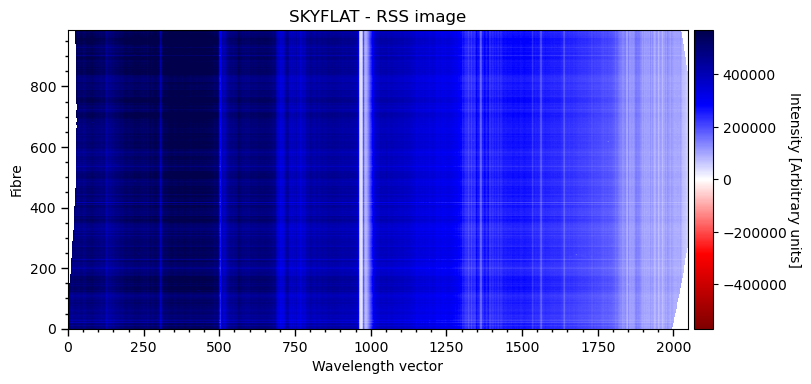

  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "SKYFLAT",   Name of this Python RSS object = "skyflat_red".

> Processing file combined_skyflat_red.fits as requested... 
> Applying nearest neighbour interpolation to remove NaN values ...
> Mask included in rss applied to make nan all bad pixels in edges.


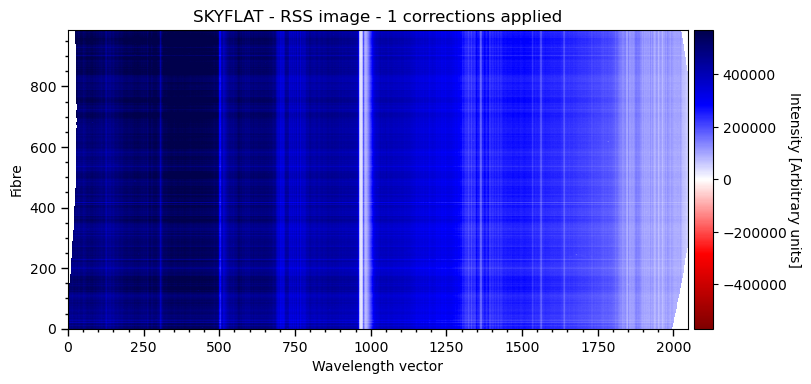


> Summary of processing rss file "combined_skyflat_red.fits" :
  Name of the observation = "SKYFLAT",   Name of this Python RSS object = "skyflat_red".
  Corrections applied: 1 in total:
  - correct_ccd_defects

  All applied corrections are stored in skyflat_red.intensity !

> Getting the throughput per wavelength...


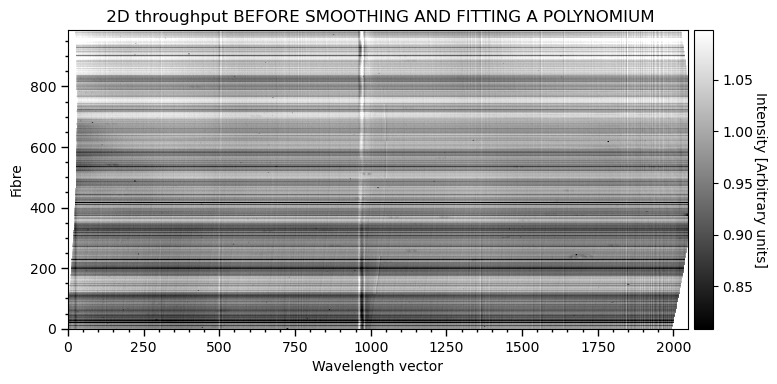


  - Applying smooth with kernel = 9  and using to fit a polynomium of degree = 11 ...


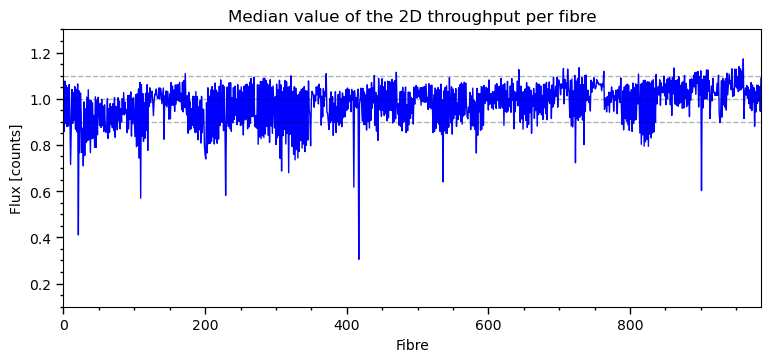

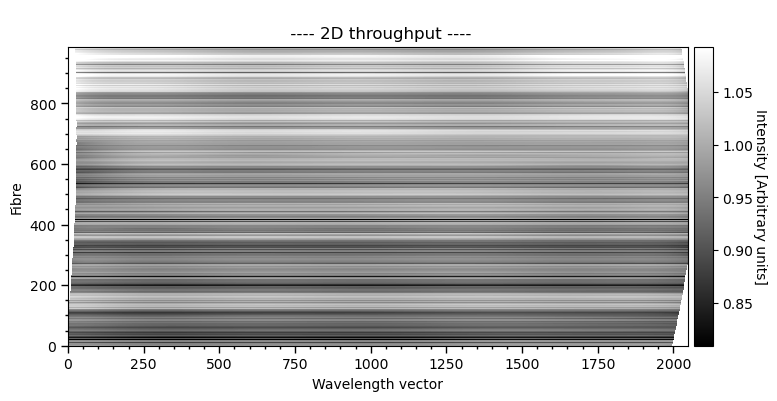

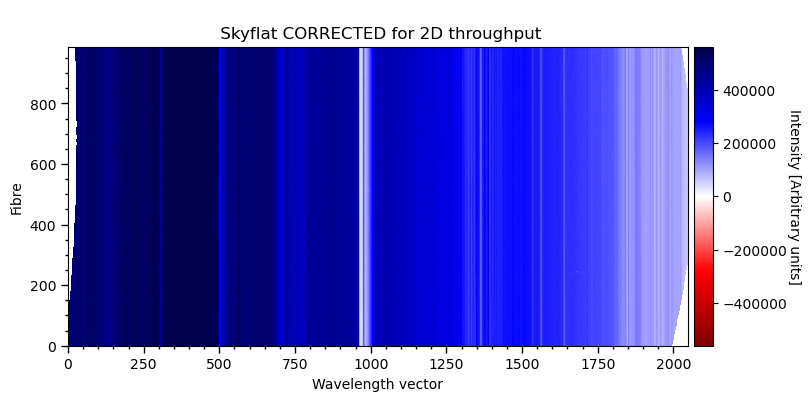


> Throughput 2D obtained!


In [3]:
# Provide the name of the flat_rss_file (listed above)
flat_rss_file = 'combined_skyflat_red.fits'
# Provide the name of the throughput_2D_file to be SAVED (if full path is not here, it will use path in parameter path)
throughput_2D_file = "throughput_2D_red.fits"
throughput_2D_red, skyflat_red = get_throughput_2D(rss_object_name="skyflat_red",          # Name of the object to be created (optional)
                                                   #rss = skyflat_red,                     # RSS to be used for obtaining throughput_2D_red
                                                   file_skyflat=flat_rss_file,             # .fits file with skyflat/domeflat
                                                   path=path_to_filename,                  # path to this file (optional)
                                                   kernel_throughput=9,                    # Use this kernel for smoothing spectral direction
                                                   index_fit_throughput =11,               # Order of the polynomiun to fit to smooth spec.
                                                   #throughput_2D_file=throughput_2D_file, # If given, .fits file saved there
                                                   also_return_skyflat=True,               # If True, returns skyflat object
                                                   correct_ccd_defects=True,               # Correct ccd_defects (True recommended)
                                                   plot_final_rss = True,                  # Plot final rss
                                                   verbose= True,
                                                   verbose_counter = False,                # In Spyder, this provides info about processing
                                                                                           # fibre after fiber, it does not work in Jypiter
                                                   plot=True)

The obtained Throughput 2D is an CORRECTION OBJECT

As we can see, the 2D throughput BEFORE smoothing and fitting a polynomium keeps atmospheric features and artefacts coming from the issue of the (small) wavelength shift problem of RSS provided by 2dFdr. 

The obtained 2D throughput is what we seek: it includes the fibre-by-fibre throughput offset (also seen in plot "Median value of the 2D throughput per fibre") AND the flatfielding in the spectral direction (this is relatively small but important).

In [4]:
# # We can also save the Throughput 2D in throughput_2D_file using:
# # NOTE: throughput_2D_file has to have the FULL path (TO BE FIXED in PyKOALA update)

# throughput.tofits(throughput_2D_file)

In [5]:
# # Read the Throughput 2D from throughput_2D_file:
# # NOTE: throughput_2D_file has to have the FULL path (TO BE FIXED in PyKOALA update)

# throughput_2D_red  = Throughput(path=throughput_2D_file)

# Obtaining the (small) wavelength shift correction

2dFdr is currently not providing a perfect wavelength calibration in all wavelengths. There is a drift from the first to the last fibre that is typically of the order of the wavelength resolution (or a bit less), ~1 A for the low-resolution gratings.

However, correcting this is CRITICAL not only for science but for getting a proper SKY SUBSTRACTION.

We find the correction reading a rss with a STAR, identifying telluric emission/absorption features near the extremes of the wavelength range (there is also a small drift with wavelength, this should be included in a future update but it is not critical for sky substraction), fitting Gaussians to find their centroid, and then fit a 1 or 2 order polynomical fit in the wavelength direction for finding the wavelength shift correction.

We use process_koala_rss() task for correcting the star rss for throughput and ccd_defects, and then task WavelengthShiftCorrection.wavelength_shift_using_skylines() for finding the wavelength shift correction. This task also performs some clipping of the outliers and median of several adjacent wavelenghts. The emission/absorption skylines can be selected or just use all bright ones in valid wavelength range.


> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits" to a koala RSS object...


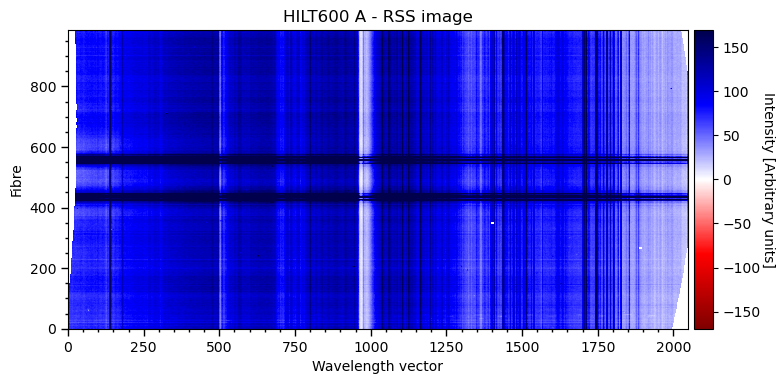

  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "star1_red".

> Processing file 27feb20028red.fits as requested... 
> Applying throughput to rss object using Python Throughput object ...
> Applying nearest neighbour interpolation to remove NaN values ...


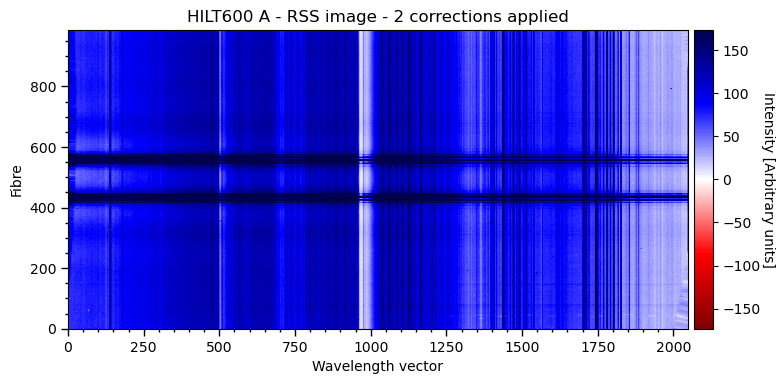


> Summary of processing rss file "27feb20028red.fits" :
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "star1_red".
  Corrections applied: 2 in total:
  - apply_throughput
  - correct_ccd_defects

  All applied corrections are stored in star1_red.intensity !


In [4]:
star_rss_file = '27feb20028red.fits' 
wavelength_shift_correction_file = "wavelength_shift_correction_red.fits"

star1_red = process_koala_rss(rss_object_name="star1_red", 
                              path = path_to_filename,
                              filename=star_rss_file, 
                              apply_throughput = True, 
                              throughput=throughput_2D_red,
                              correct_ccd_defects = True,
                              plot_final_rss= True, 
                              plot = True, 
                              verbose = True)

In [ ]:
#Parameters for wavelength_shift_using_skylines():    (more in the task)

star1_red                            # rss of the star to use
wavelength_shift_correction_file     # wavelength_shift_correction_file to be saved
path = path_to_filename,             # path to file and where wavelength_shift_correction_file will be saved (if its full path not given)
median_fibres = 7,                   # Do the Gaussian fitting promediating 7 adjacent wavelengths (optional, default is 5)
sky_lines = [6300.309, 8430.147],    # Use these skylines (optional, default are all in the valid wavelength range)
plot=True,
verbose = True,
verbose_counter = False)


> Computing small wavelength shifts using skylines...
  Checking the values of skylines provided in the file
  /DATA/KOALA/Python/Pablo/koala/src/pykoala/corrections/../input_data/sky_lines/sky_lines_rest.dat
  ---------------------------------------------------------------------
      Center   fnl  lowlow lowhigh    highlow highhigh      xmin   xmax
    -3968.000   0    135.0   60.0        25.0    90.0      3800.0 4100.0
     5577.338   0     40.0   15.0        15.0    40.0      5500.0 5650.0
     6300.309   0    150.0   80.0        80.0   150.0      6100.0 6500.0
     6363.783   0     40.0   15.0        15.0    40.0      6310.0 6420.0
     8430.147   0    260.0  160.0       275.0   315.0      8110.0 8760.0
     8465.374   0    290.0  190.0       245.0   285.0      8110.0 8760.0
     8504.780   0    325.0  225.0       205.0   245.0      8110.0 8760.0
     8919.637   0    215.0  170.0        50.0   250.0      8700.0 9200.0
     8958.103   0    255.0  210.0        50.0   250.0      870

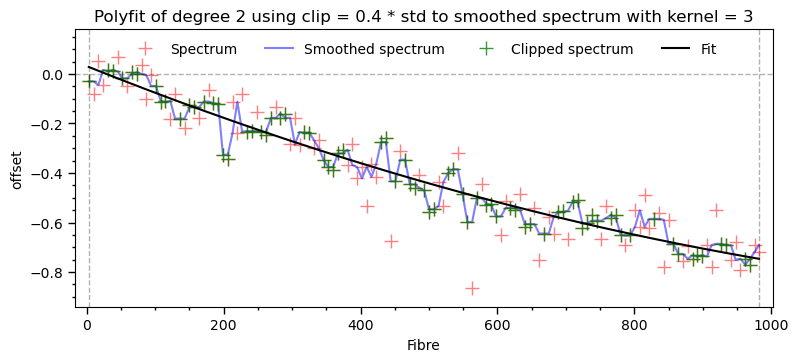

  - Checking fit in skyline 8430.147 :

> Fitting a polynomium of degree 2 using clip = 0.4 * std to smoothed spectrum with kernel =  3 ...
  Eliminated 44 outliers, the solution is:  [ 1.65729908e-07 -9.40408583e-04  4.98316930e-02]


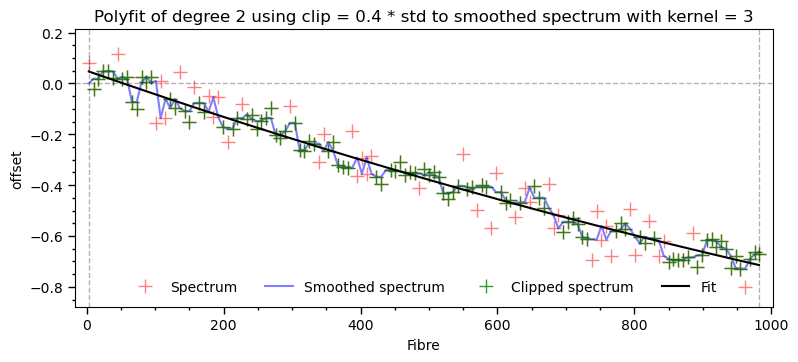

  - Checking combined fits:

> Fitting a polynomium of degree 2 using clip = 0.8 * std to smoothed spectrum with kernel =  3 ...
  Eliminated 24 outliers, the solution is:  [ 2.46959334e-07 -1.02742004e-03  4.28374193e-02]


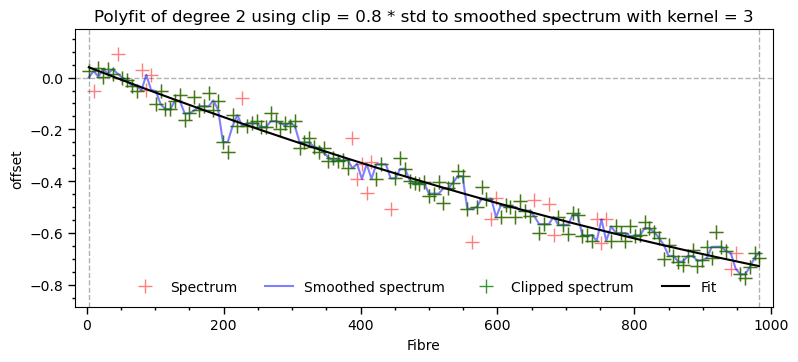


> Median of solutions to the second-order polynomy a0x +  a1x * fibre + a2x * fibre**2 to all fibres (GREEN):
  [0.04064290597953778, -0.0010240024476798238, 2.434971493492335e-07]
  offset_min = -0.732 A ,  offset_max = 0.041 A,  offset_difference = 0.772 A

> Fitting a second-order polynomy a0x +  a1x * fibre + a2x * fibre**2 to the median offset per skyline (BLUE):
  [0.04283741925236688, -0.0010274200362787554, 2.469593343718365e-07]
  offset_min = -0.730 A ,  offset_max = 0.043 A,  offset_difference = 0.772 A


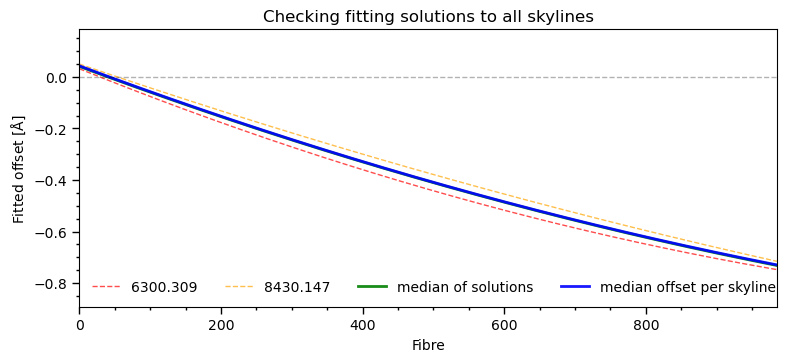

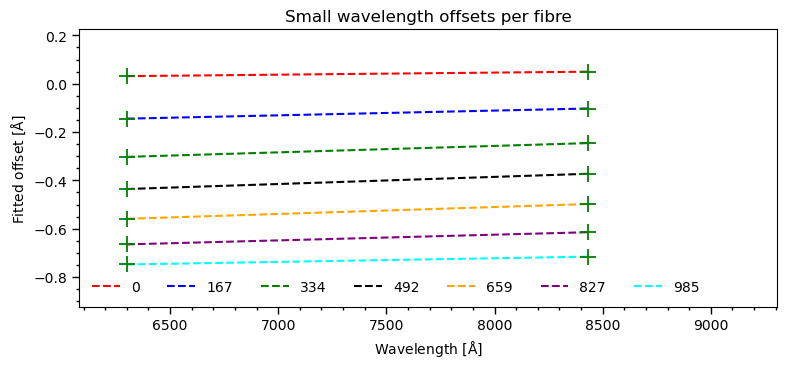


> Small wavelength offsets for selected fibres considering the 2 skylines:
  --------------------------------------------------
  Fibre        Min     Med    Max      std      disp   (all in A)
      0      0.031   0.041  0.050    0.009     0.018
    167     -0.145  -0.124 -0.103    0.021     0.042
    334     -0.303  -0.274 -0.246    0.028     0.057
    492     -0.436  -0.404 -0.373    0.031     0.063
    659     -0.559  -0.528 -0.498    0.031     0.061
    827     -0.665  -0.640 -0.615    0.025     0.050
    985     -0.748  -0.732 -0.716    0.016     0.032
  --------------------------------------------------

> Computing small wavelength shifts using skylines COMPLETED and saved in a WavelengthShiftCorrection object!


In [6]:
wavelength_shift_correction_red = WavelengthShiftCorrection.wavelength_shift_using_skylines(star1_red, #show_fibres=[0],
                                                                                            #wavelength_shift_correction_file = wavelength_shift_correction_file,
                                                                                            path = path_to_filename,
                                                                                            median_fibres = 7, #
                                                                                            #only_fibre =100,
                                                                                            sky_lines = [6300.309, 8430.147], # 8465.374],
                                                                                            plot=True,
                                                                                            verbose = True,
                                                                                            verbose_counter = False)

In [7]:
# # Saving wavelength_shift_correction_red:
# wavelength_shift_correction_red.tofits("wavelength_shift_correction_red.fits", path_to_filename)

In [8]:
# # Reading wavelength_shift_correction_red from fits files:
wavelength_shift_correction_red = WavelengthShiftCorrection(fits_file="wavelength_shift_correction_red.fits",  
                                                            path_to_file=path_to_filename)

[WavelengthShiftCorrection] Loading WavelengthShiftCorrection from /DATA/KOALA/Jacinda/pablo_data/385R/wavelength_shift_correction_red.fits


# Obtaining the Telluric correction

We can use 1 or many rss files with calibration stars (ideally, telluric stars, but at least being sure these stars do not have important absorption lines) using the task obtain_telluric_correction(). 

First, we have to be sure that the RSS files of the stars have been corrected for:
1. Throughput
2. ccd_defects
3. wavelenght shifts
4. extinction




> Processing rss 1 of 3 :    ---------------------------------------------

> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20028red.fits" to a koala RSS object...
  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "star1_red".

> Processing file 27feb20028red.fits as requested... 
> Applying throughput to rss object using Python Throughput object ...
> Applying nearest neighbour interpolation to remove NaN values ...
> Applying wavelength shift solution to all fibres in object using median offset for skyline ...
  Polynomic solution: [ 1.00129027e-01 -1.10156218e-03  2.75998633e-07]
  offset_min = -0.717 A ,  offset_max = 0.100 A,  offset_difference = 0.817 A

> Small fixing of the wavelength shif

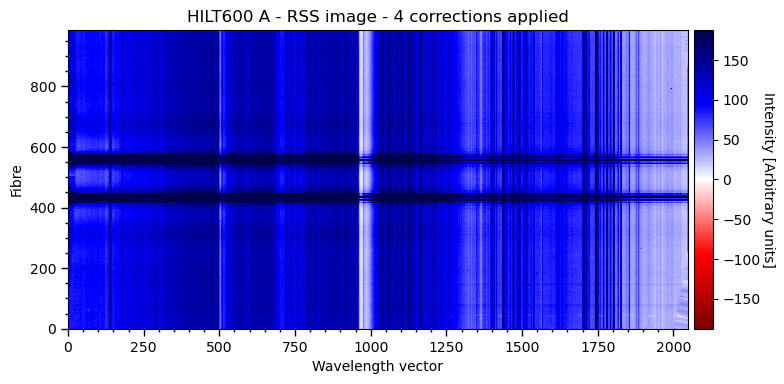


> Summary of processing rss file "27feb20028red.fits" :
  Name of the observation = "HILT600 A",   Name of this Python RSS object = "star1_red".
  Corrections applied: 4 in total:
  - apply_throughput
  - correct_ccd_defects
  - wavelength_shift_correction
  - extinction_correction

  All applied corrections are stored in star1_red.intensity !

> Processing rss 2 of 3 :    ---------------------------------------------

> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20029red.fits" to a koala RSS object...
  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "HILT600 B 3S",   Name of this Python RSS object = "star2_red".

> Processing file 27feb20029red.fits as requested... 
> Applying throughput to rss object using Python Throughput object ...
> A

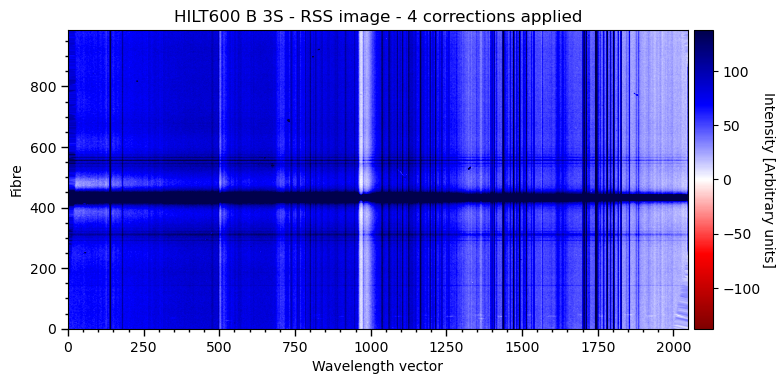


> Summary of processing rss file "27feb20029red.fits" :
  Name of the observation = "HILT600 B 3S",   Name of this Python RSS object = "star2_red".
  Corrections applied: 4 in total:
  - apply_throughput
  - correct_ccd_defects
  - wavelength_shift_correction
  - extinction_correction

  All applied corrections are stored in star2_red.intensity !

> Processing rss 3 of 3 :    ---------------------------------------------

> Converting KOALA+AAOmega RSS file "/DATA/KOALA/Jacinda/pablo_data/385R/27feb20030red.fits" to a koala RSS object...
  Found 986 spectra with 2048 wavelengths between 6080.96 and 9305.36 Angstroms.
  This RSS file uses the 385R grating in the red AAOmega arm.
  The KOALA field of view is WIDE: 50.6" x 27.4", with a spaxel size of 1.25" and PA = 89.9º.
  Name of the observation = "HILT600 C 3W",   Name of this Python RSS object = "star3_red".

> Processing file 27feb20030red.fits as requested... 
> Applying throughput to rss object using Python Throughput object ...


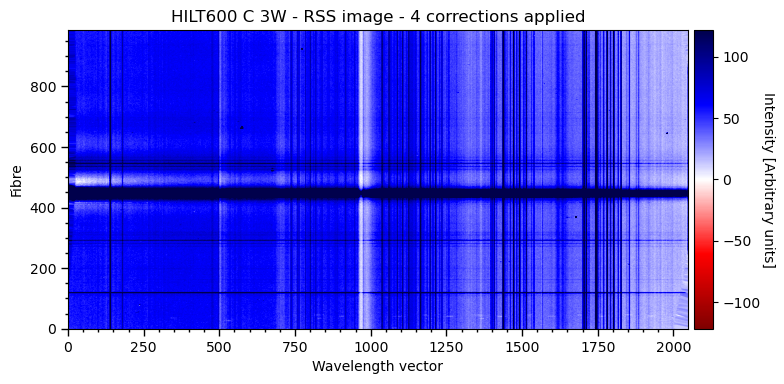


> Summary of processing rss file "27feb20030red.fits" :
  Name of the observation = "HILT600 C 3W",   Name of this Python RSS object = "star3_red".
  Corrections applied: 4 in total:
  - apply_throughput
  - correct_ccd_defects
  - wavelength_shift_correction
  - extinction_correction

  All applied corrections are stored in star3_red.intensity !


In [9]:
star_rss_files = ["27feb20028red.fits", "27feb20029red.fits", "27feb20030red.fits"]
rss_object_name_list = ["star1_red", "star2_red", "star3_red"]

star1_red, star2_red, star3_red = process_n_koala_rss_files(filename_list = star_rss_files,
                                                            path = path_to_filename,
                                                            rss_object_name_list = rss_object_name_list,
                                                            apply_throughput = True, throughput=throughput_2D_red,
                                                            correct_ccd_defects = True, 
                                                            fix_wavelengths = True, 
                                                            wavelength_shift_correction = wavelength_shift_correction_red,
                                                            correct_for_extinction = True,
                                                            plot_final_rss= True,
                                                            plot = False,                   # For making this step easier to see 
                                                            verbose = True)


> Obtaining telluric correction using 3 stars...
[Correction: TelluricCorretion] Obtaining telluric correction using spectrophotometric star...
[Correction: TelluricCorretion] Estimating telluric correction using input observation


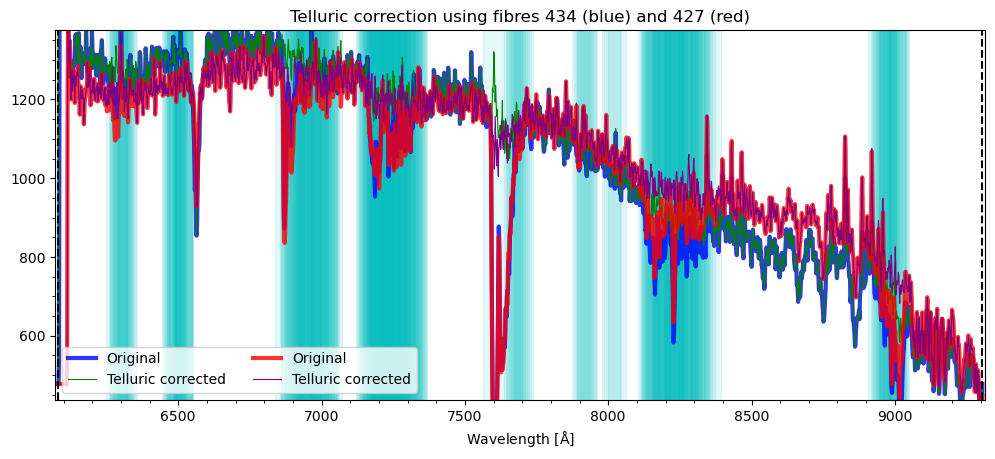

[Correction: TelluricCorretion] Obtaining telluric correction using spectrophotometric star...
[Correction: TelluricCorretion] Estimating telluric correction using input observation


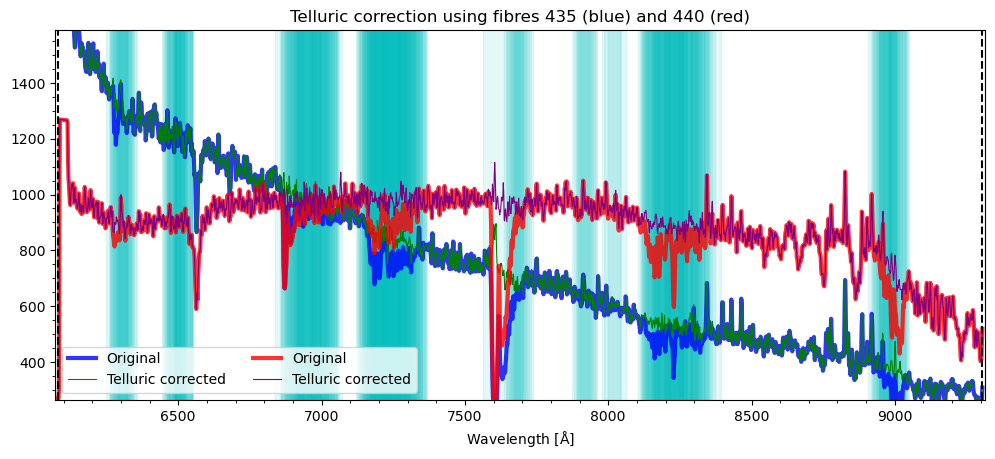

[Correction: TelluricCorretion] Obtaining telluric correction using spectrophotometric star...
[Correction: TelluricCorretion] Estimating telluric correction using input observation


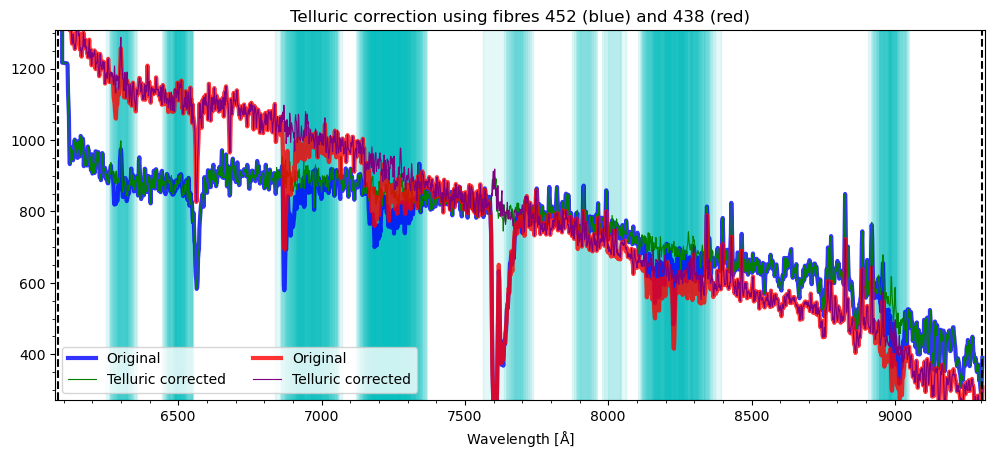

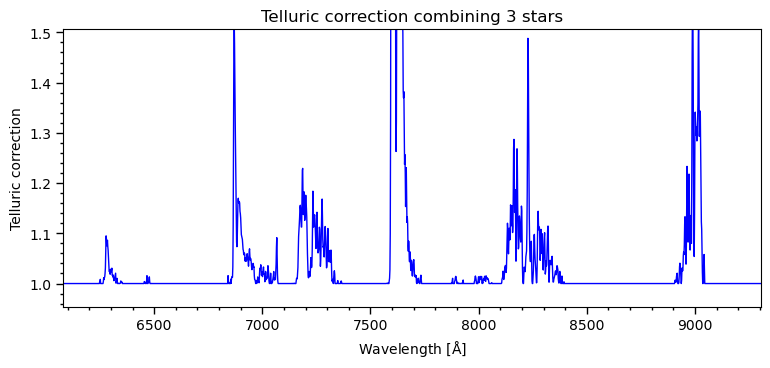

In [10]:
star_list = [star1_red, star2_red, star3_red]    
#telluric_correction_file = "telluric_correction.txt"  
telluric_correction = obtain_telluric_correction(star_list = star_list,
                                                 #telluric_correction_file = telluric_correction_file,   # if given, it is saved there
                                                 #path_to_data = path_to_filename,
                                                 #width_for_telluric = 30,
                                                 verbose = True,
                                                 plot=True)

# Prepare the calibration of the night

The calibration of the night includes 4 calibrations:

1. Throughput 2D correction
2. Small wavelength shifts correction
3. Telluric correction (only for red data)
4. Absolute flux calibration

We have already obtained 1, 2, and 3. For getting the best absolute flux calibration we need combine and process the stars cubes (we'll do it later), but we can start preparing the calibration of the night using the OBJECT "NIGHT_CALIBRATION".

We run task "create_night_calibration()":

In [14]:
calibration_night_385R = create_night_calibration(data_container = star1_red,            # rss object of star (for taking date, grating...)
                                                  #date = None,
                                                  #grating = None,
                                                  #wavelength = None,
                                                  throughput = throughput_2D_red, 
                                                  wavelength_shift_correction = wavelength_shift_correction_red,
                                                  telluric_correction = telluric_correction,
                                                  #flux_calibration = None,
                                                  #star_list = None                     # These are stars object with the info of calibration stars
                                                  verbose = True)


> Creating object with the calibration of the night...
  Date:  2018:02:27   , AAOmega grating : 385R
   - Wavelength: length = 2048    w[0] = 6080.95886230418      w[-1] = 9305.35705566416
   - Saving throughput ...
   - Saving wavelength_shift_correction ...
   - Saving telluric_correction ...


Another option for getting the calibration of the night is reading directly the files that we have created for each calibration:

In [15]:
throughput_2D_file = "throughput_2D_red.fits"
wavelength_shift_correction_file = "wavelength_shift_correction_red.fits"
telluric_correction_file = "telluric_correction.txt"
#flux_calibration_file = "flux_calibration_385R.dat"

calibration_night_385R = NIGHT_CALIBRATION(path=path_to_filename,  
                                           throughput = throughput_2D_file,  
                                           wavelength_shift_correction=wavelength_shift_correction_file, 
                                           telluric_correction = telluric_correction_file,
                                           #flux_calibration = flux_calibration_file,
                                           verbose=True)

 - Reading throughtput calibration from file /DATA/KOALA/Jacinda/pablo_data/385R/throughput_2D_red.fits
[Throughput] Loading throughput from /DATA/KOALA/Jacinda/pablo_data/385R/throughput_2D_red.fits
 - Reading wavelength shift correction from file /DATA/KOALA/Jacinda/pablo_data/385R/wavelength_shift_correction_red.fits
[WavelengthShiftCorrection] Loading WavelengthShiftCorrection from /DATA/KOALA/Jacinda/pablo_data/385R/wavelength_shift_correction_red.fits
 - Reading telluric correction from file /DATA/KOALA/Jacinda/pablo_data/385R/telluric_correction.txt
[Correction: TelluricCorretion] Obtaining telluric correction using spectrophotometric star...
[Correction: TelluricCorretion] Reading telluric correction from input file /DATA/KOALA/Jacinda/pablo_data/385R/telluric_correction.txt


(It will continue as soon as I get the cubing working...)